In [1]:
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import the original data

In [2]:
orig_data = pd.read_csv("Hotel Reservations.csv")
orig_data.shape
orig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [3]:
orig_data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


# Add the new Feautures


In [4]:
#Feature 1--> Bookings Duration
orig_data.insert(loc=orig_data.columns.get_loc('no_of_week_nights') + 1, column='booking_duration', value= orig_data['no_of_weekend_nights'] + orig_data['no_of_week_nights'])

#Feature 2--> Difference in price and avg price
orig_data.insert(loc=orig_data.columns.get_loc('avg_price_per_room') + 1, column='price_difference', value=orig_data['avg_price_per_room'] - orig_data.groupby('arrival_month')['avg_price_per_room'].transform('mean'))

# Hodilay/new Feature addition


In [5]:
pip install holidays

Note: you may need to restart the kernel to use updated packages.


In [6]:
from datetime import date 
import holidays
import calendar

In [7]:
for ptr in holidays.Portugal(years = 2017).items():
    print(ptr) 
print('-------------------------------------------')
for ptr in holidays.Portugal(years = 2018).items():
    print(ptr) 
    
print('-------------------------------------------')
print('Ιδιες ημερομηνιες αργιων/εορτων τα ετη 2017/2018')

(datetime.date(2017, 1, 1), 'Ano Novo')
(datetime.date(2017, 4, 14), 'Sexta-feira Santa')
(datetime.date(2017, 4, 16), 'Páscoa')
(datetime.date(2017, 6, 15), 'Corpo de Deus')
(datetime.date(2017, 10, 5), 'Implantação da República')
(datetime.date(2017, 11, 1), 'Dia de Todos os Santos')
(datetime.date(2017, 12, 1), 'Restauração da Independência')
(datetime.date(2017, 4, 25), 'Dia da Liberdade')
(datetime.date(2017, 5, 1), 'Dia do Trabalhador')
(datetime.date(2017, 6, 10), 'Dia de Portugal, de Camões e das Comunidades Portuguesas')
(datetime.date(2017, 8, 15), 'Assunção de Nossa Senhora')
(datetime.date(2017, 12, 8), 'Imaculada Conceição')
(datetime.date(2017, 12, 25), 'Dia de Natal')
-------------------------------------------
(datetime.date(2018, 1, 1), 'Ano Novo')
(datetime.date(2018, 3, 30), 'Sexta-feira Santa')
(datetime.date(2018, 4, 1), 'Páscoa')
(datetime.date(2018, 5, 31), 'Corpo de Deus')
(datetime.date(2018, 10, 5), 'Implantação da República')
(datetime.date(2018, 11, 1), 'Dia

In [8]:
value = pd.to_datetime(orig_data['arrival_year'].astype(str) + '-' + orig_data['arrival_month'].astype(str) + '-' + orig_data['arrival_date'].astype(str), errors = 'coerce')
orig_data.insert(loc=orig_data.columns.get_loc('arrival_date') + 1, column = 'arrival_date_format', value = value )

holidays_portugal = holidays.Portugal(years=2018)

# Create a binary indicator for holidays for each booking
orig_data.insert(loc=orig_data.columns.get_loc('arrival_date_format') + 1, column = 'is_holiday', value = False )


for idx, row in orig_data.iterrows():
    arrival_date = row['arrival_date_format']
    total_nights = row['no_of_weekend_nights'] + row['no_of_week_nights']
    departure_date = arrival_date + pd.DateOffset(days=total_nights - 1)
    
    # Check if arrival_date is not NaT
    if pd.notna(arrival_date) & pd.notna(departure_date):
            
     # Check if any day of the booking period is a holiday
        if any(date.date() in holidays_portugal for date in pd.date_range(arrival_date, departure_date, freq ='D')):
            orig_data.at[idx, 'is_holiday'] = True

In [9]:
orig_data['is_holiday'].value_counts()

False    32098
True      4177
Name: is_holiday, dtype: int64

In [10]:
orig_data.shape
orig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Booking_ID                            36275 non-null  object        
 1   no_of_adults                          36275 non-null  int64         
 2   no_of_children                        36275 non-null  int64         
 3   no_of_weekend_nights                  36275 non-null  int64         
 4   no_of_week_nights                     36275 non-null  int64         
 5   booking_duration                      36275 non-null  int64         
 6   type_of_meal_plan                     36275 non-null  object        
 7   required_car_parking_space            36275 non-null  int64         
 8   room_type_reserved                    36275 non-null  object        
 9   lead_time                             36275 non-null  int64         
 10

# Tranforming our data to numeric

  1ος τροπος 

In [11]:
#orig_data=orig_data.apply(pd.to_numeric, errors='coerce',downcast='integer')
#orig_data.describe()

 2ος τρόπος 

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()
le_count = 0 
for col in orig_data: 
    if orig_data[col].dtype == 'object' or orig_data[col].dtype == 'datetime64[ns]' or orig_data[col].dtype == 'bool' : 
        orig_data[col] = le.fit_transform(orig_data[col]) 
        le_count += 1
print('%d στήλες έχουν μετατραπεί.' % le_count)

7 στήλες έχουν μετατραπεί.


In [14]:
orig_data.describe()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,booking_duration,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,...,arrival_date_format,is_holiday,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,price_difference,no_of_special_requests,booking_status
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,...,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,3.627500e+04,36275.000000,36275.000000
mean,18137.000000,1.844962,0.105279,0.810724,2.204300,3.015024,0.515644,0.030986,0.708890,85.232557,...,327.918429,0.115148,3.552447,0.025637,0.023349,0.153411,103.423539,8.785462e-15,0.619655,0.672364
std,10471.834844,0.518715,0.402648,0.870644,1.410905,1.786017,1.048131,0.173281,1.399851,85.930817,...,139.854142,0.319205,0.681536,0.158053,0.368331,1.754171,35.089424,3.310747e+01,0.786236,0.469358
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.159069e+02,0.000000,0.000000
25%,9068.500000,2.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,17.000000,...,242.000000,0.000000,3.000000,0.000000,0.000000,0.000000,80.300000,-1.896087e+01,0.000000,0.000000
50%,18137.000000,2.000000,0.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,57.000000,...,346.000000,0.000000,4.000000,0.000000,0.000000,0.000000,99.450000,-3.149763e+00,0.000000,1.000000
75%,27205.500000,2.000000,0.000000,2.000000,3.000000,4.000000,0.000000,0.000000,0.000000,126.000000,...,445.000000,0.000000,4.000000,0.000000,0.000000,0.000000,120.000000,1.553913e+01,1.000000,1.000000
max,36274.000000,4.000000,10.000000,7.000000,17.000000,24.000000,3.000000,1.000000,6.000000,443.000000,...,549.000000,1.000000,4.000000,1.000000,13.000000,58.000000,540.000000,4.481163e+02,5.000000,1.000000


# Plot cancellation

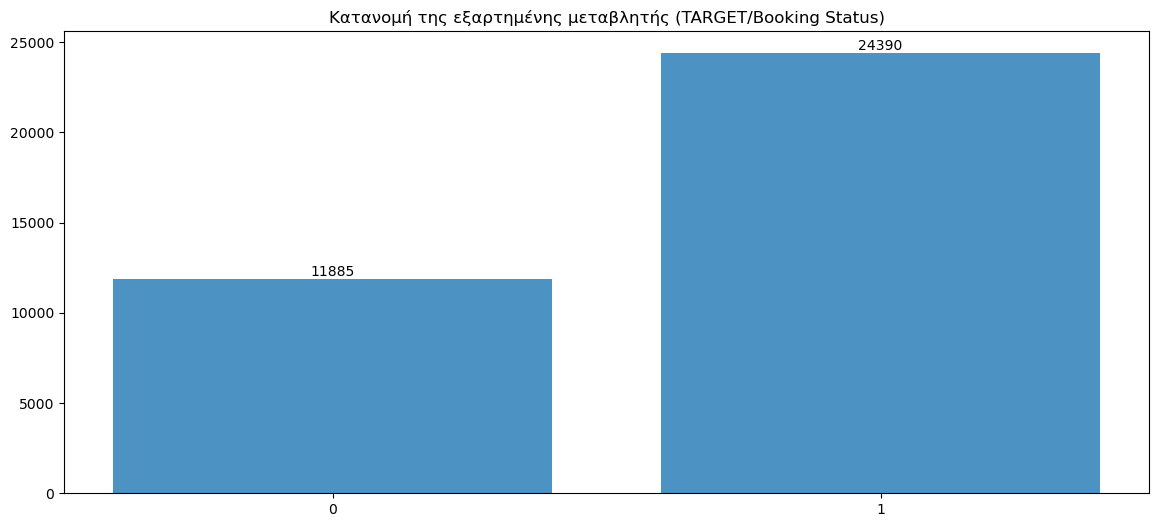

In [15]:
class_sep = orig_data['booking_status'].value_counts().reset_index()

# Bar plot with matplotlib
plt.figure(figsize=(14, 6))
p1 = plt.bar(class_sep['index'], class_sep['booking_status'], alpha=0.8)
plt.xticks(class_sep['index'])
plt.bar_label(p1)
plt.title("Κατανομή της εξαρτημένης μεταβλητής (TARGET/Booking Status)")
plt.show()

11885 ειναι οι ακυρωσεις!


In [16]:
# Get an exact percentage of not cancelled and cancelled
orig_data['booking_status'].value_counts()/orig_data['booking_status'].count()

1    0.672364
0    0.327636
Name: booking_status, dtype: float64

# Splitting data to features and labels

θα αφαιρεσω την 1 στηλη booking_ID καθως δεν εχει προβλεπτικη ισχη και ως target column θα ορισω προφανως την τελευταια (πρεπει να αφαιρεθει απο τα Χ ), booking_status. Οι υπολοιπες ειναι παραμετροι προβλεψης

In [17]:
X, y = orig_data.iloc[:,1:-1], orig_data.iloc[:,-1]

# Train and test split

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=123)

In [19]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: booking_status, dtype: int32

In [20]:
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,booking_duration,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,arrival_date,arrival_date_format,is_holiday,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,price_difference,no_of_special_requests
0,2,0,1,2,3,0,0,0,224,2017,...,2,93,0,3,0,0,0,65.00,-39.460873,0
1,2,0,2,3,5,3,0,0,5,2018,...,6,493,0,4,0,0,0,106.68,15.394574,1
2,1,0,2,1,3,0,0,0,1,2018,...,28,242,0,4,0,0,0,60.00,-20.733644,0
3,2,0,0,2,2,0,0,0,211,2018,...,20,323,0,4,0,0,0,100.00,-13.810677,0
4,2,0,1,1,2,3,0,0,48,2018,...,11,284,0,4,0,0,0,94.50,-7.498801,0


# XGBClassifier

In [21]:
# Instatiate a XGBClassifier 
xgb_clf=xgb.XGBClassifier(random_state=123)

# Inspect the parameters
xgb_clf.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 123,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

# Grid Search

In [22]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

συγκρινω ποιες ειναι οι πιο απότελεσματικες υπερπαραμετροι

In [ ]:
xgb_param_grid={"n_estimators":[100,600,1000],
                "max_depth":[3,4,5],
                "learning_rate":[0.01,0.1,0.3],
                'scale_pos_weight':[0.487228987]}

xgb = XGBClassifier(objective="binary:logistic", eval_metric="auc", random_state=123)

cv_f=StratifiedKFold(n_splits=3,shuffle=True)

rand_search = GridSearchCV(estimator=xgb, param_grid=xgb_param_grid, n_jobs=2, cv=cv_f, verbose=1, scoring='roc_auc')

rand_search.fit(X_train,y_train)

preds= rand_search.predict(X_test)

print("The accuracy score is: " , accuracy_score(y_test, preds))
print("Below, it is presented the classification report")
print(classification_report(y_test, preds))
print("An initial presentation of the confusion matrix")
print(confusion_matrix(y_test, preds))

Fitting 3 folds for each of 27 candidates, totalling 81 fits


In [ ]:
print("Best parameters found:", rand_search.best_params_)
print("Best score found:", rand_search.best_score_)

# Confusion Matrix

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm=confusion_matrix(y_test, preds, labels=rand_search.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ακυρωμένη',' Μη Ακυρωμένη']) 
fig, ax = plt.subplots(figsize=(10,6))
disp.plot(ax=ax)
plt.title(" Πίνακας Σύγχυσης /The confusion matrix")
plt.ylabel("Πραγματική τιμή (True label)") 
plt.xlabel("Τιμή που προβλέφθηκε (Predicted label)")
plt.show()

# Η καμπύλη ROC

In [ ]:
from sklearn import metrics
preds2 = rand_search.predict_proba(X_test)[::,1] 
fpr,tpr, _ = metrics.roc_curve(y_test, preds2)

In [ ]:
plt.subplots(figsize=(10,6)) 
plt.plot(fpr,tpr) 
plt.ylabel('True Positive Rate') 
plt.xlabel('False Positive Rate') 
plt.title("The ROC curve") 
plt.show()

# Η καμπύλη AUC

In [ ]:
auc = metrics.roc_auc_score(y_test, preds2)

In [ ]:
plt.subplots(figsize=(10,6)) 
plt.plot(fpr,tpr,label="AUC="+str(auc)) 
plt.ylabel('True Positive Rate') 
plt.xlabel('False Positive Rate') 
plt.legend(loc=4)
plt.title("The AUC curve") 
plt.show()

# Διαγραμμα σπουδαιότητας βαση βαρυτητας weight¶

In [ ]:
from xgboost import plot_importance
xgb_cl = rand_search.best_estimator_ 
fig, ax = plt.subplots(figsize=(10, 6))
plot_importance(xgb_cl, importance_type='weight', max_num_features=15, ax=ax)
plt.show()

# Διαγραμμα σπουδαιότητας βαση βαρυτητας κερδους

In [ ]:
xgb_cl = rand_search.best_estimator_ 
fig, ax = plt.subplots(figsize=(10, 6)) 
plot_importance(xgb_cl, importance_type='gain', max_num_features=15, ax=ax) 
plt.show()

# SHAP - EXPLAINABILITY

In [ ]:
pip install shap

In [ ]:
import shap

In [ ]:
# compute SHAP values
explainer = shap.Explainer(rand_search.best_estimator_, X_train)
shap_values = explainer(X_train)

In [ ]:
shap_values.base_values

# BEEWARM

In [ ]:
shap.plots.beeswarm(shap_values)

# VIOLIN

In [ ]:
shap.summary_plot(shap_values, plot_type='violin')

In [ ]:
shap.plots.scatter(shap_values[:, "lead_time"])

In [ ]:
shap.plots.scatter(shap_values[:, "market_segment_type"])

# LOCAL BAR PLOT

Για την ανάλυση των τοπικών επιπτώσεων, μπορούμε να χρησιμοποιήσουμε τις ακόλουθες γραφικές παραστάσεις σε μεμονωμένες παρατηρήσεις ( shap_values[0] ).

In [ ]:
shap.plots.bar(shap_values[0])

In [ ]:
shap_values[0]

In [ ]:
shap_values[1]

# WATERFALL

In [ ]:
shap.plots.waterfall(shap_values[0])

# FORCE PLOT

In [ ]:
import matplotlib
import shap

shap.initjs()
shap.force_plot(shap_values[0], matplotlib=True)

In [ ]:
shap.decision_plot( shap_values[0] )